In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).\
                     order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

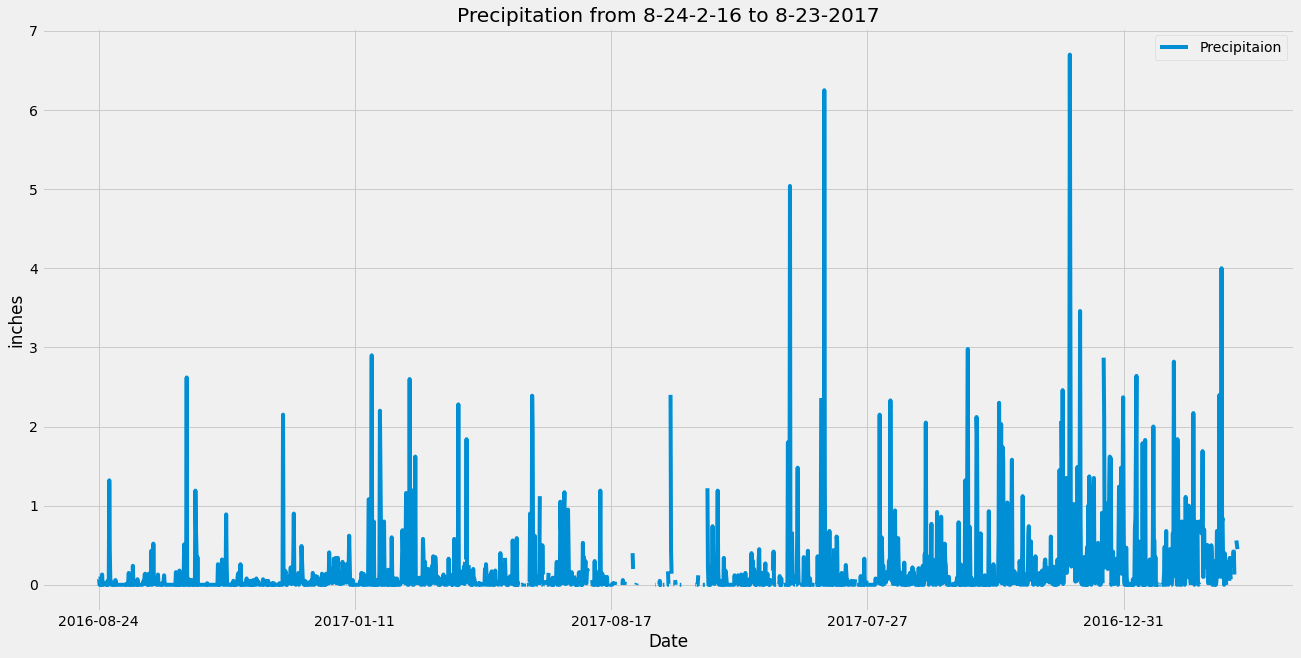

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

twelve_months = dt.date(2017,8,23) - dt.timedelta(weeks=52)

# Perform a query to retrieve the date and precipitation scores
data_precp = session.query(measurement.date,measurement.prcp).\
                filter(measurement.date>=twelve_months).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

data_precp_df =pd.DataFrame(data_precp, columns=['Date',
                                                  'Precipitaion'])

data_precp_df.set_index(data_precp_df['Date'], inplace=True)

# Sort the dataframe by date

# data_precp_sorted_df = data_precp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

data_precp_df.plot(figsize=(20,10))
plt.title("Precipitation from 8-24-2-16 to 8-23-2017")
plt.ylabel("inches")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_precp_df.describe()

,Precipitaion
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [130]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(measurement.station).distinct().count()
total_stations

9

In [138]:
Station_names = session.query(measurement.station).distinct().all()
Station_names

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [131]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station,func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').all()

most_active

[(54.0, 85.0, 71.66378066378067)]

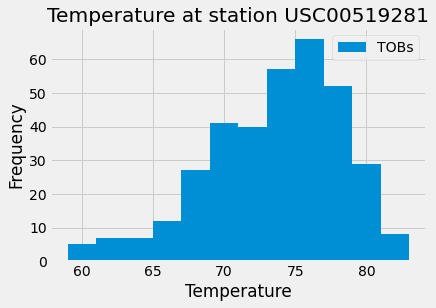

In [133]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12_mos = session.query(measurement.date, measurement.tobs).\
                filter(measurement.station == 'USC00519281').\
                filter(measurement.date>=twelve_months).all()

USC00519281_df = pd.DataFrame(station_12_mos, columns=['Date',
                                                  'Temperature(TOBs)'])

# USC00519281_df.set_index(USC00519281_df['Temperature(TOBs)'], inplace=True)

USC00519281_df.hist(bins=12)
plt.title("Temperature at station USC00519281")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(['TOBs'])

# Close session

In [134]:
# Close Session
session.close()